# Demonstration of Pulse and Signal Classes

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import src.signal.signal as sgl
import src.signal.pulse as pls

## The Pulse Class

In [3]:
#default values for pulse parameters:
pls.Pulse()

pulse_period: 0.7, pulse_width: 0.05, pulse_phase: 3.141592653589793, pulse_peaks: True, pulse_height: 1.0, pulse_type: gaussian, pulse_sigma: 1

In [4]:
#optional name and description
pls.Pulse(name='Kevin', description='an interesting pulse')

name: Kevin, description: an interesting pulse, pulse_period: 0.7, pulse_width: 0.05, pulse_phase: 3.141592653589793, pulse_peaks: True, pulse_height: 1.0, pulse_type: gaussian, pulse_sigma: 1

In [38]:
#dictionary version:
pls.Pulse(name='Kevin', description='an interesting pulse').to_dict()

{'name': 'Kevin',
 'description': 'an interesting pulse',
 'pulse_period': 0.7,
 'pulse_width': 0.05,
 'pulse_phase': 3.141592653589793,
 'pulse_peaks': True,
 'pulse_height': 1.0,
 'pulse_type': 'gaussian',
 'pulse_sigma': 1}

## Pulse Types and their Profiles

In [5]:
#the pulse types
pls.Pulse._pulsetypes

['square', 'left triangle', 'right triangle', 'triangle', 'gaussian']

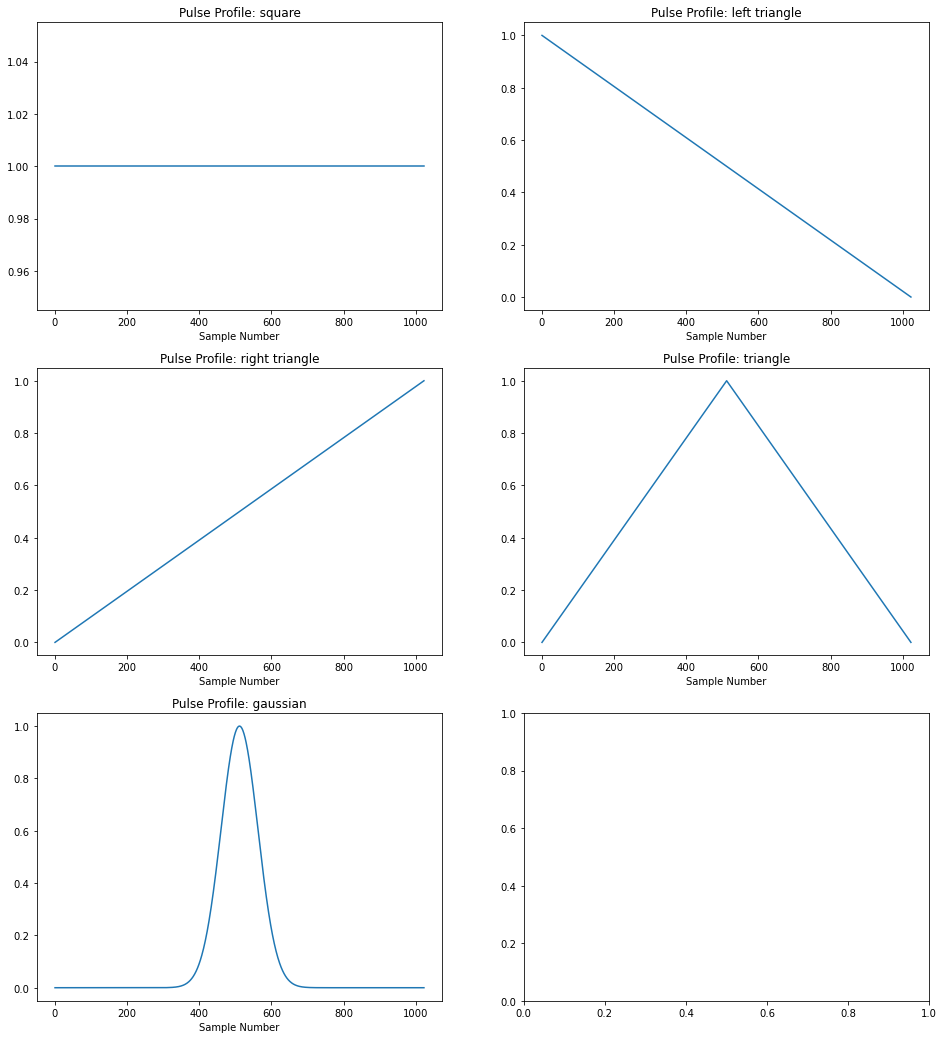

In [6]:
#what they look like
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16,18))
for pt, ax in zip(pls.Pulse._pulsetypes, axs.flatten()):
    ax.plot(pls.Pulse(pulse_type=pt)._pulse_profile(1024))
    ax.set_title(f'Pulse Profile: {pt}')
    ax.set_xlabel('Sample Number')

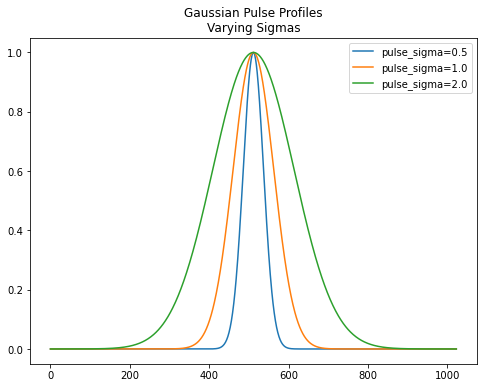

In [7]:
#gaussian profile has sigma parameter to control width:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
for ps in [0.5,1.0, 2.0]:
    ax.plot(pls.Pulse(pulse_type='gaussian', pulse_sigma=ps)._pulse_profile(1024),
        label = f'pulse_sigma={ps}')
ax.set_title('Gaussian Pulse Profiles\nVarying Sigmas')
ax.legend()

### Pulse Period, Width, and Phase

The `Pulse.pulse_signal(tsamp=1./1024, sigdur=300)` method produces a pulse train of a given duration at a given sampling interval.  Both parameters are in seconds.

Below we create several 5 second pulse trains varying the properties of the individual pulses.

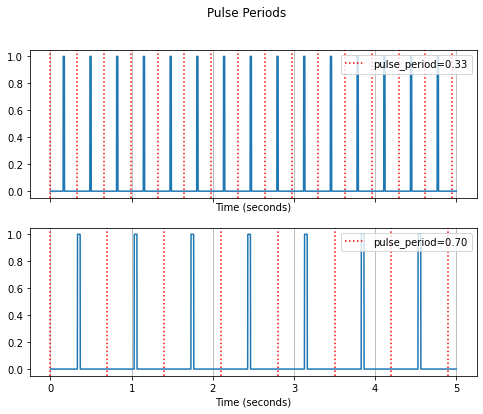

In [58]:
#compare 0.33 and 0.7 pulse periods
sigdur = 5 # seconds
tsamp = 1/1024 # default sampling interval
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,6), sharex=True, sharey=True)
sigdur = 5
for pp, ax in zip([0.33, 0.7],axs.flatten()):
    xx = np.linspace(0, sigdur, int(sigdur/tsamp))

    pulse =  pls.Pulse(pulse_type='square', pulse_period=pp)

    phase_breaks = np.arange(0,sigdur,pulse.pulse_period)
    ax.plot(xx, pulse.pulse_signal(tsamp=tsamp,sigdur=sigdur))#,
        #label = f'pulse_period={pp}')
    for pb in phase_breaks:
        hdl = ax.axvline(pb, color='red', alpha=1.0, ls=':')

    handles, labels =ax.get_legend_handles_labels()
    handles += [hdl] 
    labels += [f'pulse_period={pulse.pulse_period:.2f}']
    ax.legend(handles, labels, loc='upper right')

    ax.set_xlabel('Time (seconds)')
    ax.grid(axis='x')
zz=fig.suptitle('Pulse Periods')

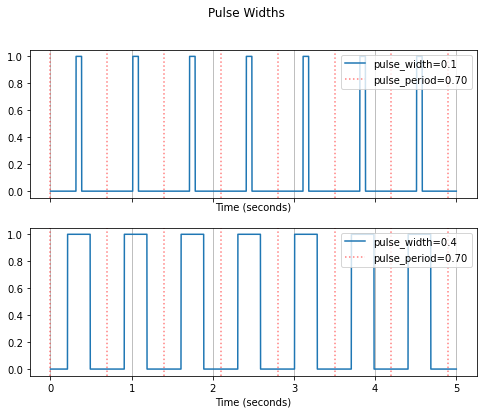

In [56]:
#compare pulse width of 0.1 (default) and 0.4
#pulse widths are fraction of pulse period that pulse occupies
#square pulses for illustration
sigdur = 5 # seconds
tsamp = 1/1024 # default sampling interval
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,6), sharex=True, sharey=True)
sigdur = 5
for pw, ax in zip([0.1, 0.4],axs.flatten()):
    xx = np.linspace(0, sigdur, int(sigdur/tsamp))

    pulse =  pls.Pulse(pulse_type='square', pulse_width=pw)
    
    phase_breaks = np.arange(0,sigdur,pulse.pulse_period)
    ax.plot(xx, pulse.pulse_signal(tsamp=tsamp,sigdur=sigdur),
        label = f'pulse_width={pw}')
    for pb in phase_breaks:
        hdl = ax.axvline(pb, color='red', alpha=0.5, ls=':')

    handles, labels =ax.get_legend_handles_labels()
    handles += [hdl] 
    labels += [f'pulse_period={pulse.pulse_period:.2f}']
    ax.legend(handles, labels, loc='upper right')

    ax.set_xlabel('Time (seconds)')
    ax.grid(axis='x')
zz=fig.suptitle('Pulse Widths')

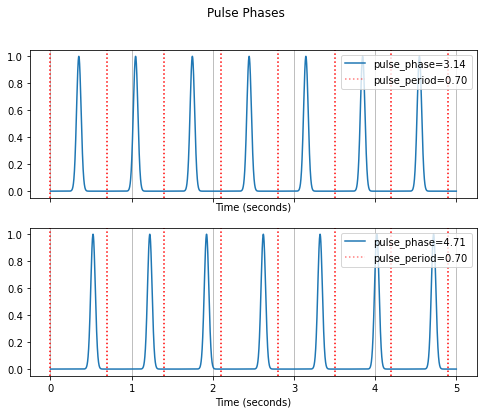

In [55]:
#compare phases
#pulses are centered in pulse period at pi radians (default)
#shift to 3/2 pi (should move pulse to left in signal)
sigdur = 5 # seconds
tsamp = 1/1024 # default sampling interval
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,6), sharex=True, sharey=True)
sigdur = 5
for pw, ax in zip([np.pi, 3*np.pi/2],axs.flatten()):
    xx = np.linspace(0, sigdur, int(sigdur/tsamp))

    pulse = pls.Pulse(pulse_type='gaussian',pulse_width=0.4, pulse_sigma=2, pulse_phase=pw)
    
    phase_breaks = np.arange(0,sigdur,pulse.pulse_period)
    ax.plot(xx, pulse.pulse_signal(tsamp=tsamp,sigdur=sigdur),
        label = f'pulse_phase={pw:.2f}')
    for pb in phase_breaks:
        hdl=ax.axvline(pb, color='red', alpha=1.0, ls=':')

    handles, labels =ax.get_legend_handles_labels()
    handles += [hdl] 
    labels += [f'pulse_period={pulse.pulse_period:.2f}']
    ax.legend(handles, labels, loc='upper right')

    ax.set_xlabel('Time (seconds)')
    ax.grid(axis='x')
zz=fig.suptitle('Pulse Phases')

### Peaks and Valleys

The `pulse_peaks` parameter controls whether pulse peaks (True) or pulse valleys (False) are produced.

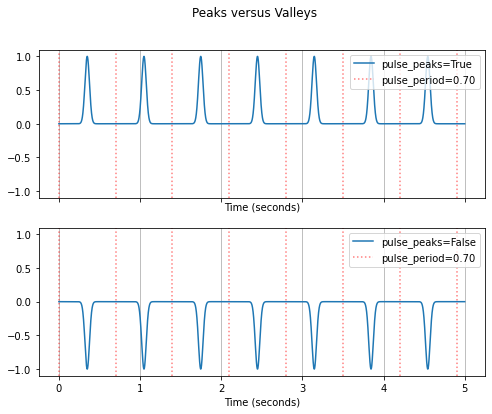

In [52]:
#show peaks versus vallyes
sigdur = 5 # seconds
tsamp = 1/1024 # default sampling interval
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,6), sharex=True, sharey=True)
sigdur = 5
for pw, ax in zip([True, False],axs.flatten()):
    xx = np.linspace(0, sigdur, int(sigdur/tsamp))

    pulse = pls.Pulse(pulse_type='gaussian',pulse_width=0.4, pulse_sigma=2,pulse_peaks=pw)
    
    phase_breaks = np.arange(0,sigdur,pulse.pulse_period)
    ax.plot(xx, pulse.pulse_signal(tsamp=tsamp,sigdur=sigdur),
        label = f'pulse_peaks={pw}')
    for pb in phase_breaks:
        hdl = ax.axvline(pb, color='red', alpha=0.5, ls=':')
    handles, labels =ax.get_legend_handles_labels()
    handles += [hdl] 
    labels += [f'pulse_period={pulse.pulse_period:.2f}']
    ax.legend(handles, labels, loc='upper right')
    ax.set_xlabel('Time (seconds)')
    ax.grid(axis='x')
zz=fig.suptitle('Peaks versus Valleys')

In [49]:
handles

In [44]:
lgnd

In [ ]:
s = sgl.Signal()

In [ ]:
noise_props = {'noise_mu':0, 'noise_sigma':1}
noise = s._gaussian_noise(10,noise_props)

<AxesSubplot:xlabel='Time (Seconds)'>

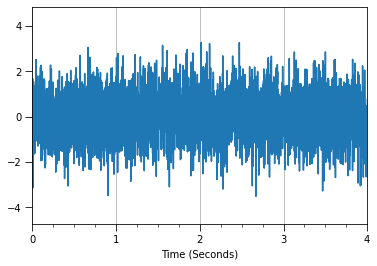

In [ ]:
s.plot_signal(noise)

In [ ]:
pulse = pls.Pulse( pulse_peaks=True,pulse_period=2, pulse_width=0.5, pulse_type='gaussian', pulse_height=6)
pulse

pulse_period: 2, pulse_width: 0.5, pulse_phase: 3.141592653589793, pulse_peaks: True, pulse_height: 6, pulse_type: gaussian, pulse_sigma: 1

<AxesSubplot:xlabel='Time (Seconds)'>

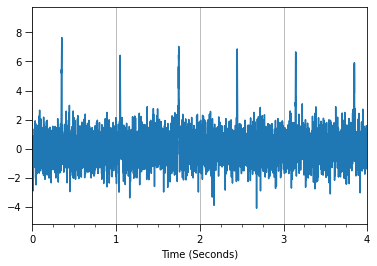

In [ ]:
sig = s.sig_gen(300,
    pls.Pulse( pulse_peaks=True,pulse_period=0.7, pulse_phase=np.pi, pulse_width=0.1, pulse_type='gaussian', pulse_height=6),
    noise_props)
s.plot_signal(sig)

In [ ]:
s.plot_signal(sig)

In [ ]:
sig = s._sinusoid(10,3, 4,0)

In [ ]:
s.plot_signal(sig)

In [ ]:
s.plot_signal(sig)

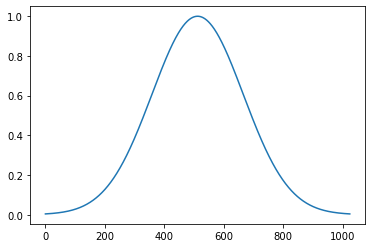

In [ ]:
plt.plot(pls.Pulse(pulse_type='gaussian', pulse_phase = np.pi/4, pulse_sigma=3)._pulse_profile(1024))

In [ ]:
plt.plot(pls.Pulse(pulse_type='gaussian', pulse_phase = np.pi, pulse_sigma=3).pulse_signal(12.0))

ZeroDivisionError: float division by zero

In [ ]:
pp = pls.Pulse( pulse_peaks=False, pulse_type='right triangle')

In [ ]:
zz=pp.pulse_signal()

In [ ]:
s.plot_signal(pls.Pulse( pulse_peaks=True, pulse_width=0.5, pulse_type='gaussian').pulse_signal())

In [ ]:
pp.pulse_period, pp.pulse_peaks

In [ ]:
pp.to_dict()

In [ ]:
[(p, getattr(pp,p)) for p in ['name','description'] if hasattr(pp,p)]

In [ ]:
zz = {'width':32, 'random_state':None}

In [ ]:
zz